# Partie I : Questions de compréhension

1. Quelle technique d’apprentissage machine utilisiez-vous pour segmenter les clients d’un commerce en plusieurs groupes ?

-   Pour segmenter les clients d’un commerce en plusieurs groupes, la technique d’apprentissage machine la plus couramment utilisée est le KMeans clustering pour identoifer les groupes homogenes en clusters ou nombres de groupe.

2. Nous disposons d’une très large base de données. Quelles partitions des données et stratégies adopterez-vous pour développer un système de classification ? Justifiez votre réponse.

- Un ensemble d’entrainement 70-80%
- Un ensemble de validation 10-15%
- Un ensemble de test 10-15%
* Avec une large base de données, un grand ensemble d'entraînement permet au modèle d'apprendre efficacement les relations entre les variables.

3. Nous disposons d’une petite base de données. Quelle stratégie de répartition des données adopterez-vous pour développer un système de classification ? Justifiez votre réponse.

- La validation croisé: permet d’utiliser l’intégralite de l’ensemble de donnéees pour l’entrainement et pour la validation.
- Deux stratégies (les plus connues)
    -   Validation k-fold (k-fold cross validation)
    -   Leave-one out cross validation
    -   Bootstrap

4. Pourquoi le regroupement est considéré comme une méthode d’apprentissage machine non-supervisé ?

La tâche d’apprentissage non-supervisé la plus courante est le regroupement (clustering) qui consiste à regrouper les données d’entrées
selon leurs caractéristiques communes,et parce qu’il ne nécessite pas de labels ou de classes prédéfinies dans les données pour fonctionner.

5. Classeriez-vous le problème de détection de spam parmi les problèmes de classification supervisée ou non-supervisée ?

Classification supervisé car les données sont étiquetées (spam ou non-spam) avant la prédiction, donc on yutilise les algorithmes supervisés  pour entrainer le modèle de detction de SPAM.

6. Pourquoi stratifier les données ?

Stratifier les données consiste à diviser les données en sous-groupes pour s'assurer que chaque groupe est représenté proportionnellement dans les ensembles d'entraînement, de validation et de test.

# Partie II : Classification de données

1. téléchargez
le contenu de la base de données et affichez son contenue. Enregistez ces données dans une structure df

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn import preprocessing
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# téléchargez le contenu de la base de données
df = pd.read_excel('C:\\Users\\bouma12\\VSCode_WorkSpace\\Fonction_travail\\ExamenFinal\winequality-red.xlsx', sheet_name='Feuil1')
# Afficher le contenue du df
display(df)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\bouma12\AppData\Local\Temp\ipykernel_29096\1181104142.py:2: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_excel('C:\\Users\\bouma12\\VSCode_WorkSpace\\Fonction_travail\\ExamenFinal\winequality-red.xlsx', sheet_name='Feuil1')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,1
1595,5.5,0.490,0.03,1.80,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,1
1596,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,1
1597,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,1


2. Identifier les différentes variables et leur type.

In [3]:
dimension = df.shape
NbrLignes = df.shape[0]
NbrColonnes = df.shape[1]
print("Dimension :",dimension)
print("Nombre de lignes :",NbrLignes)
print("Nombre de colonnes :",NbrColonnes)
display(df.columns)
display(df.dtypes)

Dimension : (1599, 12)
Nombre de lignes : 1599
Nombre de colonnes : 12


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

- La base de données contient 1599 individus et 12 caractéristiques.
- 11 caractéristiques sont de nature quantitative (type float64).
- 1 caractéristique est de type discrète ou qualitative (type int64), correspondant à 'quality'.

3. Répartissez les données en deux ensembles : 70% pour l’entrainement (train) et 30% pour le test (test) (random_state =10). Vérifiez le nombre d’individus dans chaque classe de l’ensemble train.

In [4]:
train, test = train_test_split(df, test_size = 0.3, random_state = 10)
display(train.groupby('quality').size().reset_index(name='count'))
display(test.groupby('quality').size().reset_index(name='count'))

,quality,count
0,0,989
1,1,130


,quality,count
0,0,393
1,1,87


4. Entrainez un arbre de décision qui permet de prédire la variable cible
quality à partir de l’ensemble des caractéristiques. Considérez une profondeur
de l’arbre de 2.

In [5]:
#Créer deux matrices contenant les vecteurs de caractéristiques
x_train = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y_train = train.quality
x_test = test[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y_test = test.quality
fn = [['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
cn = [1,0]

In [6]:
# Construction d'un arbre de décision profondeur 2
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_train, y_train)
display(clf)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


5. Représentez (afficher) l’arbre de décision.

[Text(0.5, 0.8333333333333334, 'x[10] <= 11.083\ngini = 0.205\nsamples = 1119\nvalue = [989, 130]'),
 Text(0.25, 0.5, 'x[10] <= 10.45\ngini = 0.084\nsamples = 842\nvalue = [805, 37]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.036\nsamples = 654\nvalue = [642, 12]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.231\nsamples = 188\nvalue = [163, 25]'),
 Text(0.75, 0.5, 'x[9] <= 0.675\ngini = 0.446\nsamples = 277\nvalue = [184, 93]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.315\nsamples = 143\nvalue = [115, 28]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 134\nvalue = [69, 65]')]

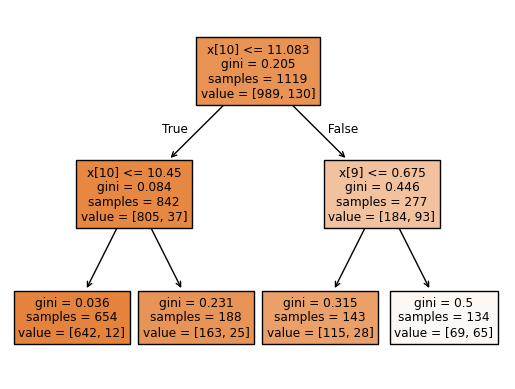

In [7]:
tree.plot_tree(clf, filled=True)

6. Identifiez les variables retenues. Quelle est la variable la plus discriminante (importante).

- alcohol x[10] est la variable la plus discriminante : elle est utilisée à la racine de l’arbre, ce qui signifie qu’elle permet de faire la séparation la plus efficace entre les classes de qualité.
- volatile acidity est utilisée dans un nœud secondaire, ce qui montre qu’elle a un pouvoir explicatif, mais moindre.
- Les autres variables (comme pH, sulphates, etc.) n’ont pas été retenues dans l’arbre à cette profondeur.

7. Représentez la matrice de confusion de l’ensemble de données de test.

In [8]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_test, y_test)
display(clf)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[[362  31]
 [ 39  48]]


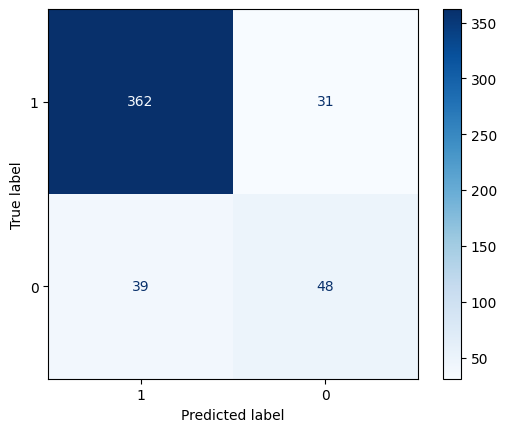

In [9]:
disp = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, display_labels=cn, cmap=plt.cm.Blues,)
print(disp.confusion_matrix)
plt.show()

8. Développez un autre arbre de décision qui permet de prédire la variable cible quality à partir de l’ensemble des caractéristiques de profondeur3. Représentez la matrice de confusion de l’ensemble de données de test et commentez les résultats.

In [10]:
# Construction d'un arbre de décision profondeur 3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)
display(clf)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.875, 'x[10] <= 11.083\ngini = 0.205\nsamples = 1119\nvalue = [989, 130]'),
 Text(0.25, 0.625, 'x[10] <= 10.45\ngini = 0.084\nsamples = 842\nvalue = [805, 37]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 11.55\ngini = 0.036\nsamples = 654\nvalue = [642, 12]'),
 Text(0.0625, 0.125, 'gini = 0.022\nsamples = 619\nvalue = [612, 7]'),
 Text(0.1875, 0.125, 'gini = 0.245\nsamples = 35\nvalue = [30, 5]'),
 Text(0.375, 0.375, 'x[9] <= 0.755\ngini = 0.231\nsamples = 188\nvalue = [163, 25]'),
 Text(0.3125, 0.125, 'gini = 0.133\nsamples = 140\nvalue = [130, 10]'),
 Text(0.4375, 0.125, 'gini = 0.43\nsamples = 48\nvalue = [33, 15]'),
 Text(0.75, 0.625, 'x[9] <= 0.675\ngini = 0.446\nsamples = 277\nvalue = [184, 93]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[0] <= 8.25\ngini = 0.315\nsamples = 143\nvalue = [115, 28]'),
 Text(0.5625, 0.125, 'gini = 0.178\nsamples = 101\nvalue = [91, 10]'),
 Text(0.6875, 0.125, 'gini = 0.49\nsamples = 42\nvalue = [24, 18]'),
 T

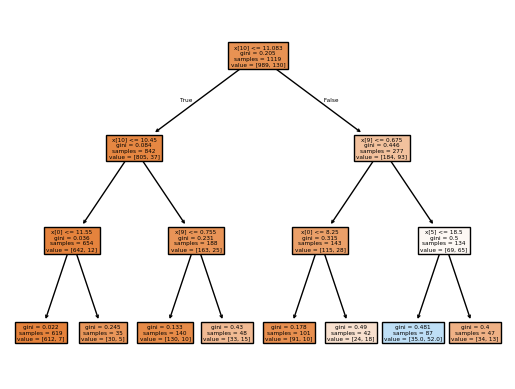

In [11]:
tree.plot_tree(clf, filled=True)

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_test, y_test)
display(clf)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[[378  15]
 [ 40  47]]


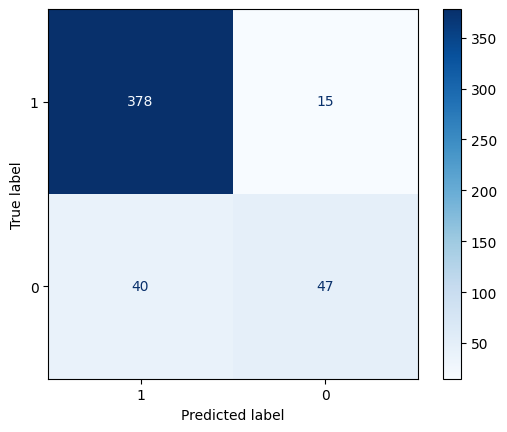

In [13]:
disp = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, display_labels=cn, cmap=plt.cm.Blues,)
print(disp.confusion_matrix)
plt.show()

L’arbre de décision de profondeur 3 permet de capturer davantage de relations entre les variables. La matrice de confusion montre que les classes majoritaires (comme 5, 6 et 7) sont relativement bien prédites. Cependant, il existe une confusion notable entre les classes voisines (par exemple, 5 et 6), ce qui est courant dans des problèmes de classification ordinales comme celui-ci. Les classes rares (comme 3 ou 8) sont souvent mal classées, probablement à cause d’un déséquilibre dans les données d’entraînement.